In [42]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [43]:
df_sin_null=pd.read_csv("../../datos/datos1/datos_sin_nulos.csv", index_col=0).reset_index(drop=True)

In [44]:
df_sin_null["rooms"]=df_sin_null["rooms"].astype("O")
df_sin_null["bathrooms"]=df_sin_null["bathrooms"].astype("O")

In [45]:
df_sin_null.duplicated().sum()

0

In [46]:
df_sin_null.head()

,price,propertyType,size,exterior,rooms,bathrooms,province,municipality,distance,status,newDevelopment,floor,district,hasLift,parkingSpace
0,750.0,flat,60.0,True,1,1,Madrid,Madrid,7037,good,False,3,Hortaleza,True,desconocido
1,750.0,flat,70.0,True,2,1,Madrid,San Sebastián de los Reyes,16145,good,False,bj,Centro Urbano,False,desconocido
2,400.0,penthouse,67.0,True,2,2,Madrid,Villamanrique de Tajo,55041,good,False,2,desconocido,False,desconocido
3,450.0,flat,89.0,False,2,1,Afueras,Recas,47186,good,False,2,desconocido,True,True
4,450.0,flat,60.0,True,2,1,Afueras,Cedillo del Condado,38237,good,False,1,desconocido,False,desconocido


In [47]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df_sin_null[["size","distance"]])
df_sin_null[["size_robust","distance_robust"]] = datos_transf_robust


escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df_sin_null[["size","distance"]])
df_sin_null[["size_MinMax","distance_MinMax"]] = datos_transf_min_max




escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df_sin_null[["size","distance"]])
df_sin_null[["size_norm","distance_norm"]] = datos_transf_norm



escalador_est = StandardScaler()
datos_transf_est = escalador_est.fit_transform(df_sin_null[["size","distance"]])
df_sin_null[["size_est", "distance_est"]] = datos_transf_est

df_sin_null.describe().T

,count,mean,std,min,25%,50%,75%,max
price,428.0,6.725467e+02,84.625889,340.000000,640.000000,700.000000,740.000000,750.000000
size,428.0,6.329907e+01,22.405484,20.000000,46.000000,61.000000,79.000000,149.000000
distance,428.0,2.157459e+04,16773.784866,183.000000,6991.000000,19101.500000,32583.500000,59919.000000
size_robust,428.0,6.966865e-02,0.678954,-1.242424,-0.454545,0.000000,0.545455,2.666667
distance_robust,428.0,9.663352e-02,0.655418,-0.739220,-0.473205,0.000000,0.526795,1.594901
size_MinMax,428.0,3.356517e-01,0.173686,0.000000,0.201550,0.317829,0.457364,1.000000
distance_MinMax,428.0,3.581022e-01,0.280799,0.000000,0.113968,0.316702,0.542395,1.000000
size_norm,428.0,7.221909e-03,0.011169,0.000798,0.002216,0.003668,0.007522,0.135355
distance_norm,428.0,9.999116e-01,0.000503,0.990797,0.999972,0.999993,0.999998,1.000000
size_est,428.0,1.328117e-16,1.001170,-1.934782,-0.772994,-0.102732,0.701583,3.829474


In [48]:
# df_num=df_sin_null.select_dtypes(np.number)
# df_num.drop(columns="price", inplace=True)
# lista_cols=df_num.columns
# lista_cols_num=lista_cols.to_list()

In [49]:
# df_robust, scaler=f.escalador_datos(df_sin_null, lista_cols_num, method = "robust")     #el scaler es para el streamlit futuro

Boxplots (Outliers) y distribuciones

In [50]:
# def boxplots_outliers_y_distribuciones(df_numerica,tamanio):
#     fig , axes = plt.subplots(nrows=len(df_numerica.columns)*2-2 , ncols=5, figsize = tamanio)
#     axes=axes.flat
    

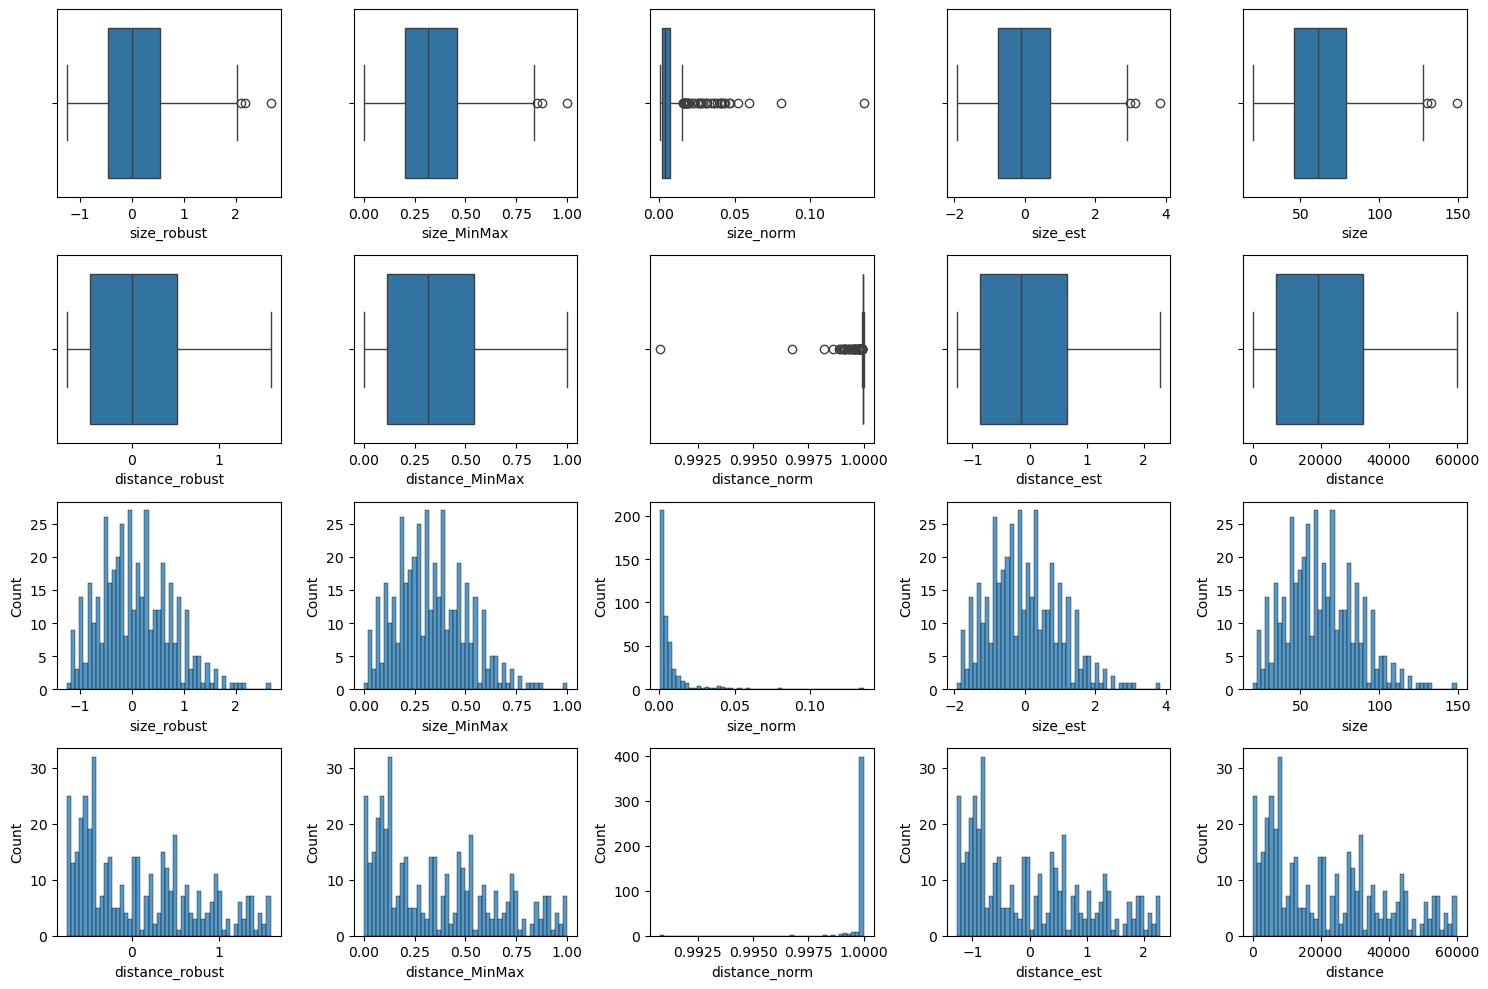

In [51]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10) )


sns.boxplot(x = "size_robust", data = df_sin_null, ax = axes[0][0])
sns.boxplot(x = "size_MinMax", data = df_sin_null, ax = axes[0][1])
sns.boxplot(x = "size_norm", data = df_sin_null, ax = axes[0][2])
sns.boxplot(x = "size_est", data = df_sin_null, ax = axes[0][3])
sns.boxplot(x = "size", data = df_sin_null, ax = axes[0][4])


sns.boxplot(x = "distance_robust", data = df_sin_null, ax = axes[1][0])
sns.boxplot(x = "distance_MinMax", data = df_sin_null, ax = axes[1][1])
sns.boxplot(x = "distance_norm", data = df_sin_null, ax = axes[1][2])
sns.boxplot(x = "distance_est", data = df_sin_null, ax = axes[1][3])
sns.boxplot(x = "distance", data = df_sin_null, ax = axes[1][4])



sns.histplot(x = "size_robust", data = df_sin_null, ax = axes[2][0],bins=50)
sns.histplot(x = "size_MinMax", data = df_sin_null, ax = axes[2][1],bins=50)
sns.histplot(x = "size_norm", data = df_sin_null, ax = axes[2][2],bins=50)
sns.histplot(x = "size_est", data = df_sin_null, ax = axes[2][3],bins=50)
sns.histplot(x = "size", data = df_sin_null, ax = axes[2][4],bins=50)


sns.histplot(x = "distance_robust", data = df_sin_null, ax = axes[3][0],bins=50)
sns.histplot(x = "distance_MinMax", data = df_sin_null, ax = axes[3][1],bins=50)
sns.histplot(x = "distance_norm", data = df_sin_null, ax = axes[3][2],bins=50)
sns.histplot(x = "distance_est", data = df_sin_null, ax = axes[3][3],bins=50)
sns.histplot(x = "distance", data = df_sin_null, ax = axes[3][4],bins=50)

plt.tight_layout()


Dado que en el proceso de limpieza y exploración se observaron y se seleccionaron los límites de lo que se consideraría outlier y lo que se considera datos erróneos, los outliers que nos aparecen aquí son datos reales con lo que si que me interesa mantenerlos.  
Es por ello que tras descartar el método de normalizar y el de escalado min y max. Tuve que elegir entre la metodología robusta y la estándar.  
Finalmente, me decanto por la robusta ya que le da más importancia a dichos outliers que ya hemos comprobado que son datos viables y coherentes.

*Entrando un poco más en detalle:*  
Los kilómetros no contaban con una cantidad ingente de outliers a diferencia de la potencia que contaba con una proporción muy alta.  
Es por ello que al comparar las distribuciones tanto entre métodos como con la variable original, tanto el robusto como el estandarizado se parecen tanto.  
  
Además, tienen sentido las distribuciones ya que al ser una tienda de coches usados, los kilómetros tienen sentido que se agrupen en los valores más altos al igual que tiene sentido que la potencia se agrupe en valores más bajos ya que no son habituales los coches con una potencia superior a 400.

In [52]:
df_sin_null.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'province', 'municipality', 'distance', 'status', 'newDevelopment',
       'floor', 'district', 'hasLift', 'parkingSpace', 'size_robust',
       'distance_robust', 'size_MinMax', 'distance_MinMax', 'size_norm',
       'distance_norm', 'size_est', 'distance_est'],
      dtype='object')

In [53]:
lista_eliminar=['distance', 'size', 'size_robust', 'distance_robust', 'size_norm',
       'distance_norm', 'size_est', 'distance_est']

In [54]:
df_sin_null.drop(columns=lista_eliminar, inplace=True)

In [57]:
df_sin_null.head(2)

,price,propertyType,exterior,rooms,bathrooms,province,municipality,status,newDevelopment,floor,district,hasLift,parkingSpace,size_MinMax,distance_MinMax
0,750.0,flat,True,1,1,Madrid,Madrid,good,False,3,Hortaleza,True,desconocido,0.310078,0.114738
1,750.0,flat,True,2,1,Madrid,San Sebastián de los Reyes,good,False,bj,Centro Urbano,False,desconocido,0.387597,0.267209


In [58]:
df_sin_null.to_csv("../../datos/datos1/datos_nulos_minmax.csv")